In [3]:
import pandas as pd
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.shape

(8807, 12)

In [11]:
df.isnull().sum() #see how many missing values each column has

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [23]:
df=df.dropna(subset=['type', 'title', 'release_year'])

In [25]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [27]:
type_counts = df['type'].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [31]:
import matplotlib.pyplot as plt

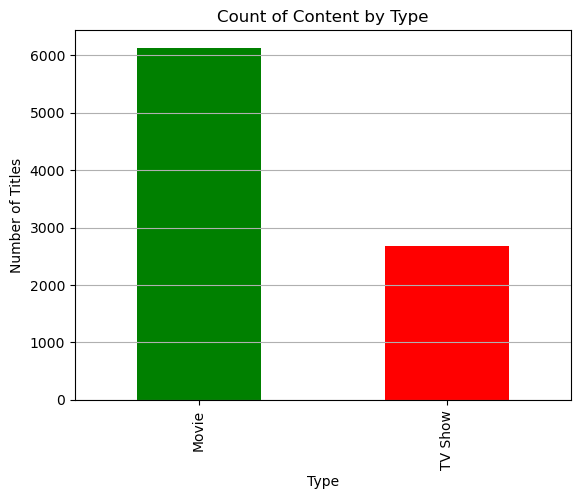

In [79]:
type_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Count of Content by Type')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()

In [81]:
df['country']=df['country'].fillna('Unknown') #fill missing values with unknown

In [83]:
top_countries=df['country'].value_counts().head(10)
print(top_countries)

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [87]:
top_countries=df[df['country'] != 'Unknown']['country'].value_counts().head(10)
print(top_countries)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


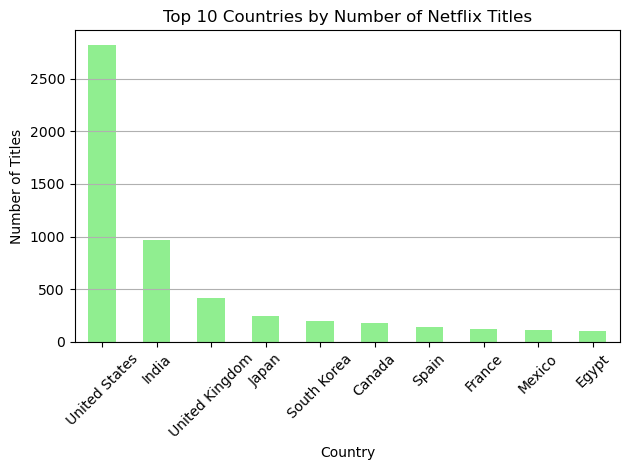

In [105]:
top_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [117]:
yearly_trend = df['release_year'].value_counts().sort_index()
print(yearly_trend.tail(10))

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


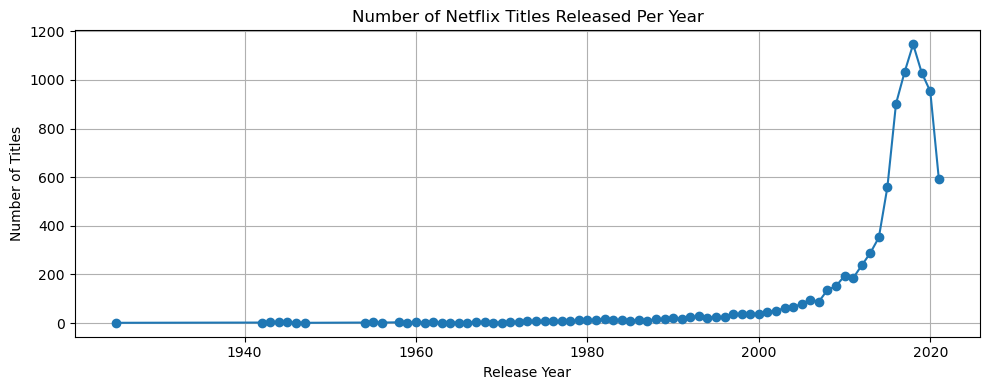

In [141]:
yearly_trend.plot(kind='line', marker='o', figsize=(10, 4))
plt.title('Number of Netflix Titles Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

In [143]:
top_raw_genres = df['listed_in'].value_counts().head(10)
print(top_raw_genres)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


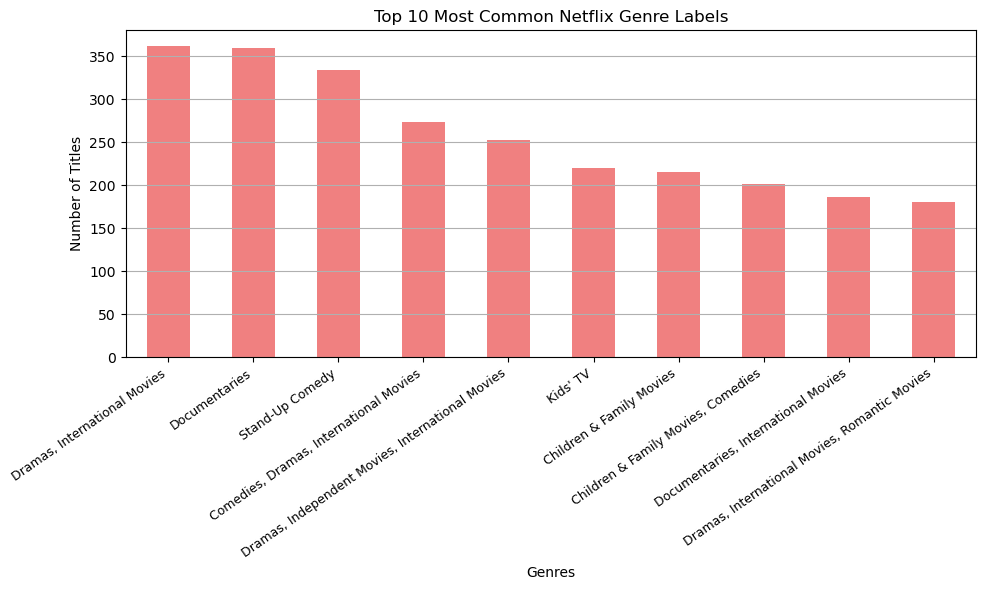

In [177]:
top_raw_genres.plot(kind='bar', color='lightcoral', figsize = (10, 6))
plt.title('Top 10 Most Common Netflix Genre Labels')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.xticks(rotation=35, ha='right', fontsize=9)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [187]:
print("Final Insights from Netflix Titles Dataset:\n")

Final Insights from Netflix Titles Dataset:



In [189]:
print("Most content on Netflix is:", df['type'].value_counts().idxmax())

Most content on Netflix is: Movie


In [185]:
print("Top country producing Netflix content:", df['country'].value_counts().idxmax())

Top country producing Netflix content: United States


In [191]:
print("Year with the highest number of releases:", df['release_year'].value_counts().idxmax())

Year with the highest number of releases: 2018


In [193]:
print("Most common genre label:", df['listed_in'].value_counts().idxmax())

Most common genre label: Dramas, International Movies


In [207]:
## 📌 Summary:

# Movies dominate the Netflix catalogue over TV shows.
# The United States is the top producer of Netflix content.
# The platform added the highest number of titles in 2018 (replace with actual year from output).
# The most common genre combination is "Dramas, International Movies", often combining drama, international, or comedy.

#This project brought together everything learned over 7 days:
#data loading, cleaning, filtering, grouping, data handling, and visualisation, all in one practical, real-world dataset.